# Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set what dataset to process

In [2]:
dataset = "../Dataset"

# Load datasets

In [3]:
data_personalise = pd.read_csv(dataset + "/PersonalisationImplementation.csv")

# Find the first and last dither period data and box plot
## First dither period

In [4]:
#pd.options.display.max_rows = 10
#pd.options.display.max_columns = 10
first_period = data_personalise[((data_personalise["iteration"] >= 1) & (data_personalise["iteration"] <=8))]
first_period = first_period.assign(case = ["First"]*72) 
first_period

,subject_num,iteration,c7_disp/cm,sa_disp/cm,time/s,accuracy/cm,parameter,cost,case
0,1,1,15.58,4.43,2.62,0.46,1.00,131.10,First
1,1,2,12.03,4.79,2.48,0.47,1.02,83.79,First
2,1,3,12.21,4.43,2.71,0.60,1.04,84.41,First
3,1,4,7.57,3.46,2.81,0.45,1.08,34.65,First
4,1,5,10.31,2.87,2.41,0.40,1.10,57.30,First
...,...,...,...,...,...,...,...,...,...
643,9,4,9.33,8.11,2.78,0.35,1.08,76.40,First
644,9,5,10.88,11.83,2.18,0.42,1.09,129.13,First
645,9,6,9.86,6.61,2.32,0.47,1.06,70.47,First
646,9,7,8.36,7.62,2.43,0.49,1.02,63.96,First


## Last dither period

In [5]:
last_period = data_personalise[((data_personalise["iteration"] >= 73) & (data_personalise["iteration"] <=80))]
last_period = last_period.assign(case = ["Last"]*72) 
last_period

,subject_num,iteration,c7_disp/cm,sa_disp/cm,time/s,accuracy/cm,parameter,cost,case
72,1,73,3.97,4.28,3.29,0.36,1.43,17.05,Last
73,1,74,4.22,5.22,2.52,0.27,1.51,22.52,Last
74,1,75,2.55,4.46,2.68,0.42,1.61,13.22,Last
75,1,76,0.39,3.24,2.82,0.45,1.68,5.31,Last
76,1,77,0.10,4.90,2.64,0.27,1.71,12.01,Last
...,...,...,...,...,...,...,...,...,...
715,9,76,4.19,5.78,1.61,0.86,1.53,25.50,Last
716,9,77,1.96,4.68,1.93,0.53,1.54,12.86,Last
717,9,78,2.34,5.28,1.82,0.71,1.49,16.71,Last
718,9,79,2.29,5.35,2.25,0.62,1.44,16.93,Last


## Concatenate first and last period data

In [6]:
data_period = pd.concat([first_period, last_period])
data_period

,subject_num,iteration,c7_disp/cm,sa_disp/cm,time/s,accuracy/cm,parameter,cost,case
0,1,1,15.58,4.43,2.62,0.46,1.00,131.10,First
1,1,2,12.03,4.79,2.48,0.47,1.02,83.79,First
2,1,3,12.21,4.43,2.71,0.60,1.04,84.41,First
3,1,4,7.57,3.46,2.81,0.45,1.08,34.65,First
4,1,5,10.31,2.87,2.41,0.40,1.10,57.30,First
...,...,...,...,...,...,...,...,...,...
715,9,76,4.19,5.78,1.61,0.86,1.53,25.50,Last
716,9,77,1.96,4.68,1.93,0.53,1.54,12.86,Last
717,9,78,2.34,5.28,1.82,0.71,1.49,16.71,Last
718,9,79,2.29,5.35,2.25,0.62,1.44,16.93,Last


In [7]:
data_period.groupby(["case"]).describe()

subject_num                                         iteration        \
            count mean       std  min  25%  50%  75%  max     count  mean   
case                                                                        
First        72.0  5.0  2.600108  1.0  3.0  5.0  7.0  9.0      72.0   4.5   
Last         72.0  5.0  2.600108  1.0  3.0  5.0  7.0  9.0      72.0  76.5   

       ... parameter        cost                                        \
       ...       75%   max count       mean        std    min      25%   
case   ...                                                               
First  ...    1.0600  1.13  72.0  98.796528  65.113035  15.97  55.8600   
Last   ...    1.7725  2.51  72.0  13.519583  12.220062   1.65   5.4225   

                                 
          50%       75%     max  
case                             
First  76.260  129.6225  282.38  
Last    9.115   16.9525   55.44  

[2 rows x 64 columns]

# Plot Boxplot

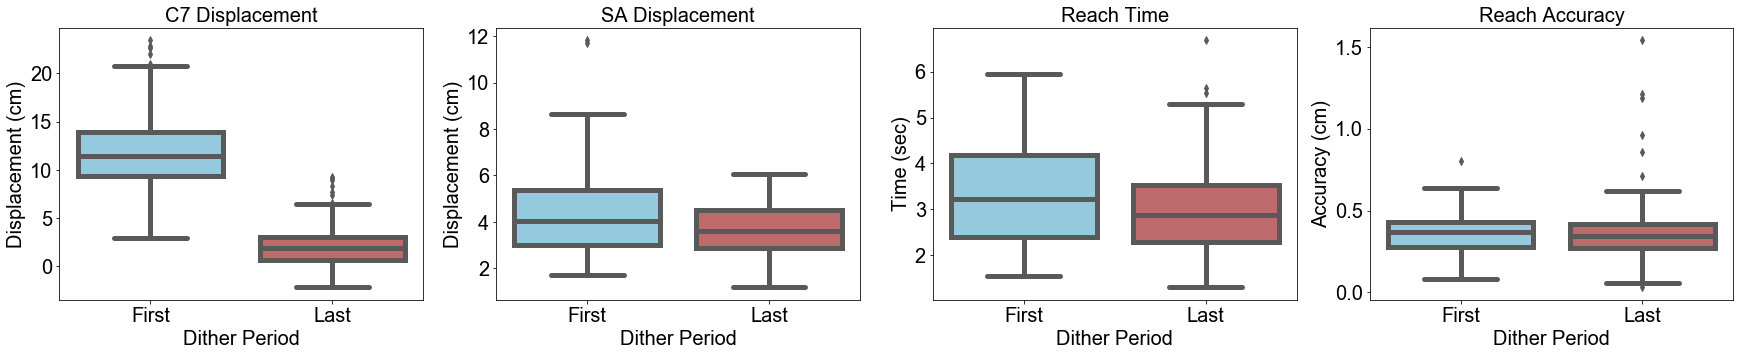

In [8]:
#Config plot
fig, axes = plt.subplots(1, 4, figsize=(30, 5))
sns.set_context("poster", rc={"lines.linewidth": 5.0, "axes.edgecolor": "0", "grid.color": ".5", "palette":"bright"})
sns.set_style("whitegrid", {"font_scale":"1", "axes.edgecolor": "0", "grid.color": ".5"})
my_pal = {"First": "skyblue", "Last": "indianred"}
FONTSIZE = 25
# Plot subplots
g1 = sns.boxplot(ax=axes[0], data=data_period, x='case', y='c7_disp/cm',palette=my_pal)
g2 =sns.boxplot(ax=axes[1], data=data_period, x='case', y='sa_disp/cm',palette=my_pal)
g3 = sns.boxplot(ax=axes[2], data=data_period, x='case', y='time/s',palette=my_pal)
g4 = sns.boxplot(ax=axes[3], data=data_period, x='case', y='accuracy/cm',palette=my_pal)


# Config labels
g1.set_title("C7 Displacement", fontsize=20)
g1.set_xlabel('Dither Period', fontsize=20)
g1.set_ylabel('Displacement (cm)', fontsize=20)
#g1.legend(fontsize=30).set_title("")
g1.tick_params(labelsize=20)

g2.set_title("SA Displacement", fontsize=20)
g2.set_xlabel('Dither Period', fontsize=20)
g2.set_ylabel('Displacement (cm)', fontsize=20)
#g2.legend(fontsize=30).set_title("")
g2.tick_params(labelsize=20)

g3.set_title("Reach Time", fontsize=20)
g3.set_xlabel('Dither Period', fontsize=20)
g3.set_ylabel('Time (sec)', fontsize=20)
#g3.legend(fontsize=30).set_title("")
g3.tick_params(labelsize=20)

g4.set_title("Reach Accuracy", fontsize=20)
g4.set_xlabel('Dither Period', fontsize=20)
g4.set_ylabel('Accuracy (cm)', fontsize=20)
#g4.legend(fontsize=30).set_title("")
g4.tick_params(labelsize=20)


# Save figure
plt.savefig("stats.pdf", format="pdf", bbox_inches = 'tight')

## C7 Displacement

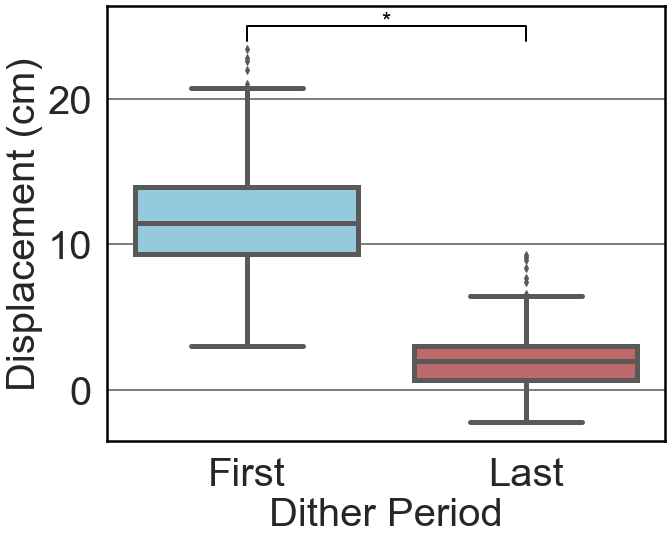

In [9]:
#Config plot
width = 10
height = 8
plt.figure(figsize=(width,height))
sns.set_context("poster", rc={"lines.linewidth": 5.0, "axes.edgecolor": "0", "grid.color": ".5", "palette":"bright"})
sns.set_style("whitegrid", {"font_scale":"1", "axes.edgecolor": "0", "grid.color": ".5"})

# Plot
my_pal = {"First": "skyblue", "Last": "indianred"}
FONTSIZE = 40
g = sns.boxplot( data=data_period, x='case', y='c7_disp/cm',palette=my_pal)
# Config labels
#g.set_title("C7 Displacement", fontsize=FONTSIZE)
g.set_xlabel('Dither Period', fontsize=FONTSIZE)
g.set_ylabel('Displacement (cm)', fontsize=FONTSIZE)
#g.legend(fontsize=30).set_title("")
g.tick_params(labelsize=FONTSIZE)

# Plot statsig
x1, x2 = 0, 1   # columns)
y, h, col =24, 1, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=2.0, c=col)
plt.text((x1+x2)*.5, y+h/2, "*", ha='center', va='bottom', color=col)

# Save figure
plt.savefig("c7_stats.pdf", format="pdf", bbox_inches = 'tight')

## SA Displacement

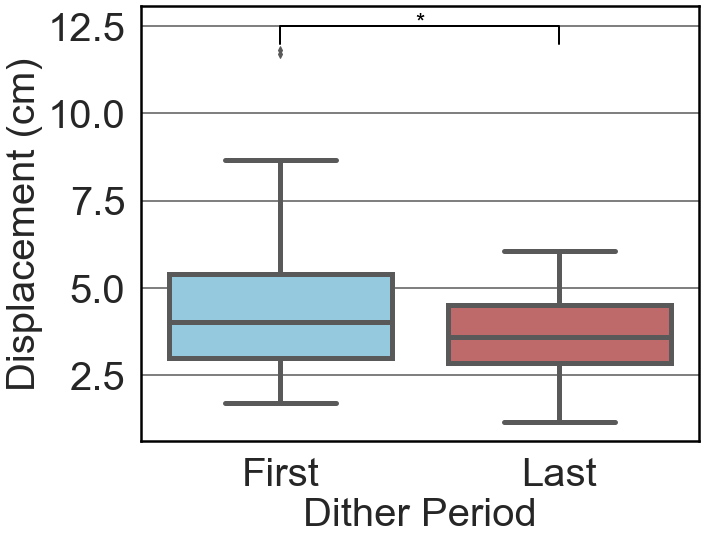

In [10]:
#Config plot
plt.figure(figsize=(width,height))
sns.set_context("poster", rc={"lines.linewidth": 5.0, "axes.edgecolor": "0", "grid.color": ".5", "palette":"bright"})
sns.set_style("whitegrid", {"font_scale":"1", "axes.edgecolor": "0", "grid.color": ".5"})

# Plot 
g = sns.boxplot( data=data_period, x='case', y='sa_disp/cm',palette=my_pal)
# Config labels
#g.set_title("SA Displacement", fontsize=FONTSIZE)
g.set_xlabel('Dither Period', fontsize=FONTSIZE)
g.set_ylabel('Displacement (cm)', fontsize=FONTSIZE)
#g.legend(fontsize=30).set_title("")
g.tick_params(labelsize=FONTSIZE)

# Plot statsig
x1, x2 = 0, 1   # columns)
y, h, col =12, 0.5, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=2.0, c=col)
plt.text((x1+x2)*.5, y+h/2, "*", ha='center', va='bottom', color=col)

# Save figure
plt.savefig("sa_stats.pdf", format="pdf", bbox_inches = 'tight')

## Time

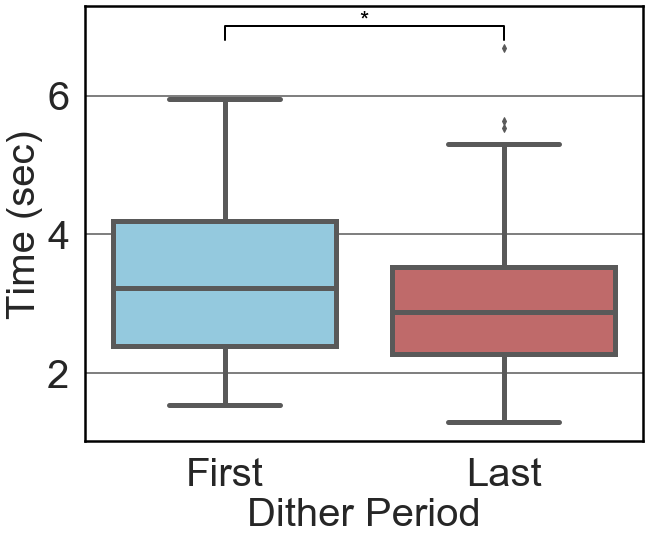

In [11]:
#Config plot
plt.figure(figsize=(width,height))
sns.set_context("poster", rc={"lines.linewidth": 5.0, "axes.edgecolor": "0", "grid.color": ".5", "palette":"bright"})
sns.set_style("whitegrid", {"font_scale":"1", "axes.edgecolor": "0", "grid.color": ".5"})

# Plot 
g = sns.boxplot( data=data_period, x='case', y='time/s',palette=my_pal)
# Config labels
#g.set_title("Reach Time", fontsize=FONTSIZE)
g.set_xlabel('Dither Period', fontsize=FONTSIZE)
g.set_ylabel('Time (sec)', fontsize=FONTSIZE)
#g.legend(fontsize=30).set_title("")
g.tick_params(labelsize=FONTSIZE)

# Plot statsig
x1, x2 = 0, 1   # columns)
y, h, col =6.8, 0.2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=2.0, c=col)
plt.text((x1+x2)*.5, y+h/2, "*", ha='center', va='bottom', color=col)

# Save figure
plt.savefig("time_stats.pdf", format="pdf", bbox_inches = 'tight')

## Accuracy

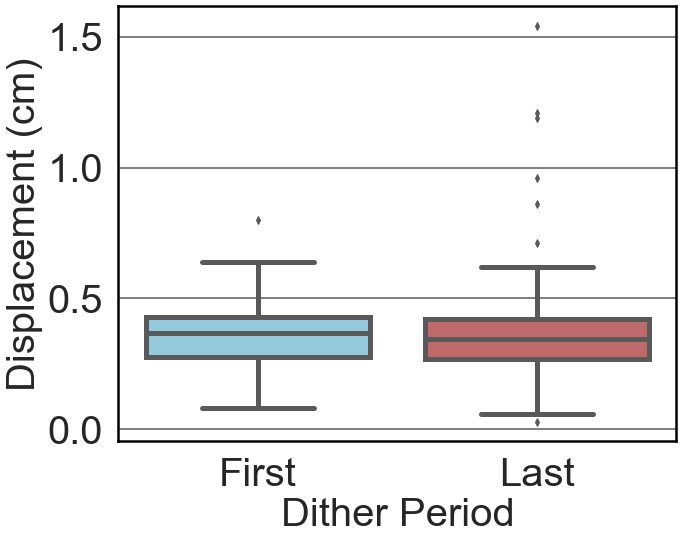

In [12]:
#Config plot
plt.figure(figsize=(width,height))
sns.set_context("poster", rc={"lines.linewidth": 5.0, "axes.edgecolor": "0", "grid.color": ".5", "palette":"bright"})
sns.set_style("whitegrid", {"font_scale":"1", "axes.edgecolor": "0", "grid.color": ".5"})
# Plot 
g = sns.boxplot( data=data_period, x='case', y='accuracy/cm', palette=my_pal)
# Config labels
#g.set_title("Reach Accuracy", fontsize=FONTSIZE)
g.set_xlabel('Dither Period', fontsize=FONTSIZE)
g.set_ylabel('Displacement (cm)', fontsize=FONTSIZE)
#g.legend(fontsize=30).set_title("")
g.tick_params(labelsize=FONTSIZE)

# Save figure
plt.savefig("acc_stats.pdf", format="pdf", bbox_inches = 'tight')

# Last period data and boxplot for each subject

## Final parameter for each subject

In [13]:

pd.options.display.max_columns = 100
last_period.groupby(["subject_num"]).describe()

iteration                                                 \
                count  mean      std   min    25%   50%    75%   max   
subject_num                                                            
1                 8.0  76.5  2.44949  73.0  74.75  76.5  78.25  80.0   
2                 8.0  76.5  2.44949  73.0  74.75  76.5  78.25  80.0   
3                 8.0  76.5  2.44949  73.0  74.75  76.5  78.25  80.0   
4                 8.0  76.5  2.44949  73.0  74.75  76.5  78.25  80.0   
5                 8.0  76.5  2.44949  73.0  74.75  76.5  78.25  80.0   
6                 8.0  76.5  2.44949  73.0  74.75  76.5  78.25  80.0   
7                 8.0  76.5  2.44949  73.0  74.75  76.5  78.25  80.0   
8                 8.0  76.5  2.44949  73.0  74.75  76.5  78.25  80.0   
9                 8.0  76.5  2.44949  73.0  74.75  76.5  78.25  80.0   

            c7_disp/cm                                                        \
                 count     mean       std   min     25%    50%     75%   max   
subject_num                                                                    
1                  8.0  1.83250  1.812620 -0.20  0.3175  1.570  3.2725  4.22   
2                  8.0  1.66500  2.093289 -2.17  0.8225  2.145  2.3925  5.12   
3                  8.0  0.83250  1.217641 -1.04  0.1075  0.820  1.3400  2.89   
4                  8.0  7.98750  1.117954  6.45  7.2025  8.035  8.9825  9.30   
5                  8.0  0.86750  1.504401 -1.36 -0.2700  1.265  2.2625  2.30   
6                  8.0  1.20125  0.850083  0.05  0.6300  1.150  1.6175  2.67   
7                  8.0  2.13125  2.416074 -0.34 -0.1750  1.890  3.5650  5.83   
8                  8.0  1.91625  0.610104  1.13  1.5525  1.745  2.2900  3.02   
9                  8.0  3.01000  0.800500  1.96  2.3275  3.025  3.5825  4.19   

            sa_disp/cm                                                        \
                 count     mean       std   min     25%    50%     75%   max   
subject_num                                                                    
1                  8.0  4.44125  0.607958  3.24  4.2300  4.480  4.8625  5.22   
2                  8.0  3.65000  0.325971  3.19  3.4850  3.580  3.8875  4.12   
3                  8.0  4.62750  0.485261  4.11  4.2500  4.515  5.0050  5.36   
4                  8.0  4.45625  0.458785  3.77  4.2575  4.470  4.6325  5.16   
5                  8.0  2.84500  0.424230  2.10  2.7450  2.870  3.0600  3.50   
6                  8.0  1.98625  0.484589  1.17  1.7450  1.915  2.3975  2.64   
7                  8.0  2.74875  0.527106  1.98  2.4150  2.835  3.0400  3.58   
8                  8.0  3.14000  0.384559  2.78  2.8100  2.975  3.5575  3.62   
9                  8.0  5.48875  0.429233  4.68  5.3025  5.490  5.7900  6.06   

            time/s                                                        \
             count     mean       std   min     25%    50%     75%   max   
subject_num                                                                
1              8.0  2.70000  0.351771  2.08  2.5800  2.660  2.8575  3.29   
2              8.0  5.10875  0.809540  4.19  4.5700  4.865  5.5575  6.68   
3              8.0  2.99000  0.423894  2.29  2.8450  3.025  3.2750  3.50   
4              8.0  1.61500  0.227847  1.30  1.4700  1.620  1.7350  2.02   
5              8.0  2.89375  0.447914  2.12  2.6700  2.910  3.1300  3.61   
6              8.0  4.19375  0.910509  2.40  3.9225  4.225  4.8325  5.26   
7              8.0  3.50625  0.828009  2.83  2.8875  3.325  3.6150  5.30   
8              8.0  2.47250  0.467692  1.87  2.1550  2.435  2.9175  3.01   
9              8.0  2.13500  0.338821  1.61  1.9025  2.200  2.3075  2.69   

            accuracy/cm                                                        \
                  count     mean       std   min     25%    50%     75%   max   
subject_num                                                                     
1                   8.0  0.34875  0.125293  0.11  0.2700  0.390  0.42

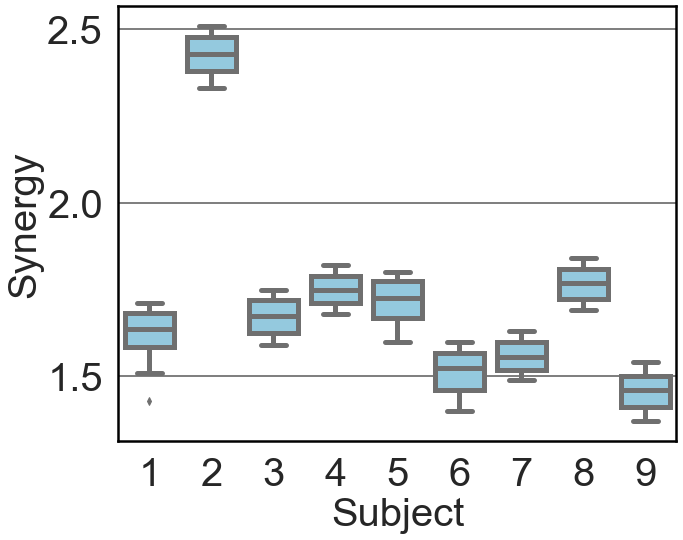

In [16]:
#Config plot
width = 10
height = 8
plt.figure(figsize=(width,height))
sns.set_context("poster", rc={"lines.linewidth": 5.0, "axes.edgecolor": "0", "grid.color": ".5", "palette":"bright"})
sns.set_style("whitegrid", {"font_scale":"1", "axes.edgecolor": "0", "grid.color": ".5"})

# Plot 
g = sns.boxplot( data=last_period, x='subject_num', y='parameter', color="skyblue")
# Config labels
#g.set_title("Parameter Box Plot for Last Dither Period", fontsize=FONTSIZE)
g.set_xlabel('Subject', fontsize=FONTSIZE)
g.set_ylabel('Synergy', fontsize=FONTSIZE)
#g.legend(fontsize=30).set_title("")
g.tick_params(labelsize=FONTSIZE)

# Save figure
plt.savefig("paramet_last_stats.pdf", format="pdf", bbox_inches = 'tight')

## Final cost for each subject

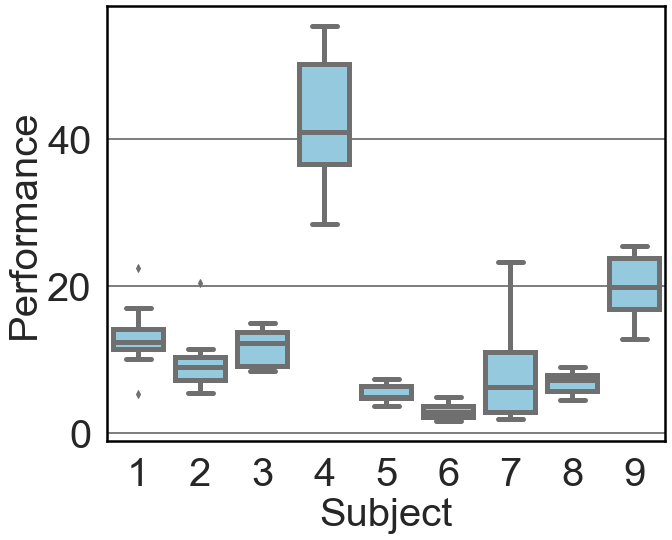

In [17]:
#Config plot
plt.figure(figsize=(width,height))
sns.set_context("poster", rc={"lines.linewidth": 5.0, "axes.edgecolor": "0", "grid.color": ".5", "palette":"bright"})
sns.set_style("whitegrid", {"font_scale":"1", "axes.edgecolor": "0", "grid.color": ".5"})

# Plot 
g = sns.boxplot( data=last_period, x='subject_num', y='cost',color="skyblue")
# Config labels
#g.set_title("Performance Box Plot for Last Dither Period", fontsize=FONTSIZE)
g.set_xlabel('Subject', fontsize=FONTSIZE)
g.set_ylabel('Performance', fontsize=FONTSIZE)
#g.legend(fontsize=30).set_title("")
g.tick_params(labelsize=FONTSIZE)

# Save figure
plt.savefig("cost_last_stats.pdf", format="pdf", bbox_inches = 'tight')